# Módulo 10: Modelos  de Regressão
# Exercício 1: Modelo de Regressão Simples

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [27]:
# carregando bibliotecas

import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [28]:
# carregando arquivo, construindo DataFrame e calculando colunas

tips = sns.load_dataset("tips")                                      # base de dados do "seaborn"
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])   # porcentagem da gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']                  # valor líquido da gorjeta



In [29]:
# informações sobre os dados

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [30]:
# modelo de regressão é a linha de tendência nos gráficos
# modelo de regressão simples para as variáveis "tip" (resposta) e "net_bill" (explicativa)

reg_1 = smf.ols('tip ~ net_bill', data = tips).fit()
reg_1.summary()

# Resumo da regressão

# Dep. Variable = variável resposta = "tip"

# R-squared = R-quadrado = 0.333 = indica que cerca de 33.3% da 
### variabilidade na gorjeta pode ser explicada pelo valor líquido da conta "net_bill".

# Intercept x coef = alpha = 1.3307 = quando o valor líquido da conta (net_bill) 
### é zero, a gorjeta prevista é de aproximadamente 1.3307.

# net_bill x coef = beta = 0.0993 =  em média, para um aumento unitário no valor 
###líquido da conta, podemos esperar um aumento de 0.0993 unidades na gorjeta.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           5.02e-23
Time:                        16:05:46   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

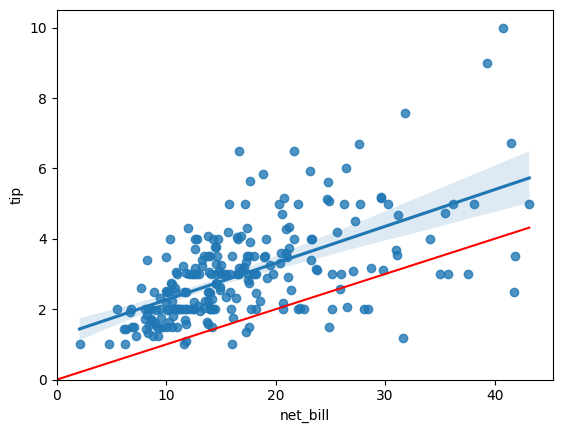

In [31]:
# gráfico de dispersão

sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)


# Resumo do gráfico

# linha vermelha = linha padrão dos 10%
# linha azul = regressão que representa a relação entre a gorjeta e o valor líquido da conta.

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [32]:
# modelo de regressão é a linha de tendência nos gráficos
# modelo de regressão simples para as variáveis "tip_pct" (resposta) e "net_bill" (explicativa)

reg_2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_2.summary()

# Resumo da regressão

# Dep. Variable = variável resposta = "tip_pct"

# R-squared = R-quadrado = 0.091 = indica que cerca de 0.09% da 
### variabilidade na gorjeta pode ser explicada pelo valor líquido da conta "net_bill".

# Intercept x coef = alpha = 0.30 = quando o valor líquido da conta (net_bill) 
### é zero, a gorjeta prevista é de aproximadamente 0.30.

# net_bill x coef = beta = -0.0061 =  em média, para um aumento unitário no valor 
### líquido da conta, podemos esperar um descréscimo de -0.0061 unidades na gorjeta.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.52e-06
Time:                        16:05:49   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 4.536353634697219)

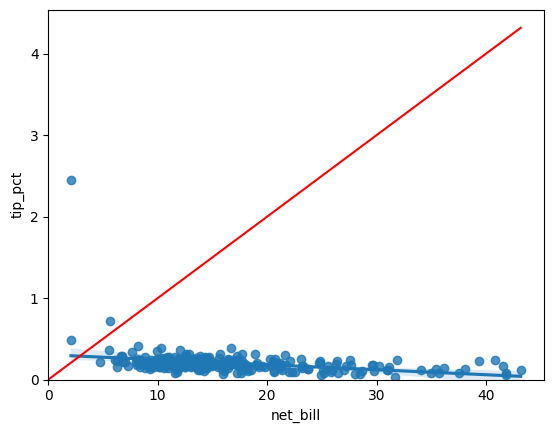

In [33]:
# gráfico de dispersão

sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

# gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)


# Resumo do gráfico

# linha vermelha = linha padrão dos 10%
# linha azul = regressão que representa a relação entre a gorjeta e o valor líquido da conta.

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

- **Resposta:**

- O primeiro gráfico mostra a relação entre as variáveis **"tip"** (gorjeta) e **"net_bill"** (gorjeta líquida). A linha de regressão (azul) representa a relação entre as duas variáveis, ou seja, quanto MAIOR a gorjeta MAIOR o valor líquido da conta. O foco do gráfico é prever a gorjeta em termos absolutos;

- O segundo gráfico mostra a relação entre as variáveis **"tip_pct"** (porcentagem da gorjeta) e **"net_bill"** (gorjeta líquida). A linha de regressão (azul) representa a relação entre as duas variáveis, ou seja, quanto MENOR a porcentagem da gorjeta MENOR o valor líquido da conta. O foco do gráfico é comparar a porcentagem da gorjeta com o valor líquido da conta;

- Não é aconselhável comparar diretamente **$R^2$s**. O **$R^2$s** é uma medida da proporção da variabilidade total explicada pelo modelo em relação à variabilidade total dos dados. Como cada comparação tem variáveis distintas podemos enxergá-las como sendo de perspectivas diferentes dos mesmo dados. Posto isso, ao compararmos os **$R^2$s** NÃO estamos fazendo uma comparação direta. 

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [58]:
# obter o valor predito para "tip_pct"

pred_values = reg_2.fittedvalues

print(f"Valor predito para tip_pct:\n{pred_values}")


# "tcp_tip" é a variável resposta do modelo "reg_2"

# "fittedvalues" é um atributo no modelo de regressão que representa 
## os valores previstos para a variável resposta, no caso, "tcp_trip"




Valor predito para tip_pct:
0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64


In [59]:
# obtenha o valor predito para "tip" como [tip_pct * net_bill]

pred_tip = pred_values * tips['net_bill']
print(f"Valor predito para tip:\n{pred_tip}")

# "pred_values" refere-se à variável resposta "tip_pct"



Valor predito para tip:
0      3.309254
1      2.186938
2      3.461450
3      3.668785
4      3.699998
         ...   
239    3.773120
240    3.790751
241    3.684707
242    3.319003
243    3.287232
Length: 244, dtype: float64


In [61]:
# calcular o 𝑅² do modelo para "tip"

reg_tip = smf.ols('tip_pct ~ net_bill', data=tips).fit()
r_squared = reg_tip.rsquared
print(f"O 𝑅² para o modelo de tip: {r_squared}")

O 𝑅² para o modelo de tip: 0.09129084920662933


- compare esse $R^2$ com o do item 1

 **Resposta:**
- O R-quadrado da regressão **"reg_2"**  é aproximadamente **0.09** enquanto que o R-quadrado para tip é aproximadamente **0.33** . Ou seja, R-quadrado = 0.091 = indica que cerca de 0.09% da variabilidade na gorjeta pode ser explicada pelo valor líquido da conta **"net_bill"**. No **item 1** o R-quadrado = 0.333 = indica que cerca de 33.3% da variabilidade na gorjeta pode ser explicada pelo valor líquido da conta **"net_bill"**;
- Resumindo, a varável **"tip"** do **item 1** da regressão **"reg_1"** é MAIS representativa para o modelo.